In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm
import statsmodels as sm

# to ignore convergence warnings 
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.sm_exceptions import ConvergenceWarning, InterpolationWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', InterpolationWarning)


# Intro to Time Series

## Additive and multiplicative seasonality – can you identify them correctly?

<!-- <img src="https://github.com/MKB-Datalab/workshop_ts_forecasting/images/image_01.png" /> -->

<img src="../images/image_01.png" />

Additive or multiplicative?

**Answer:** Additive

<!-- <img src="https://github.com/MKB-Datalab/workshop_ts_forecasting/images/image_02.png" /> -->

<img src="../images/image_02.png" />

Additive or multiplicative?

**Answer:** Multiplicative

Do you want to test how good you are in identifying additive and multiplicative seasonality comparing with statistics and other humans? 

Go to this [link](https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality)

## Time Series Decomposition

Classify trend, seasonality and if model is additive or multiplicative based on the time series decomposition.

### Google Trends - search for 'diet'

In [2]:
# load US data - diet_USA_2016_2023.csv

diet_USA = pd.read_csv('../data/processed/diet_USA_2016_2023.csv',
                   index_col=[0],
                  parse_dates=[0])

In [3]:
diet_USA.head()

,diet: (United States)
Week,
2016-03-27,58
2016-04-03,63
2016-04-10,59
2016-04-17,59
2016-04-24,58


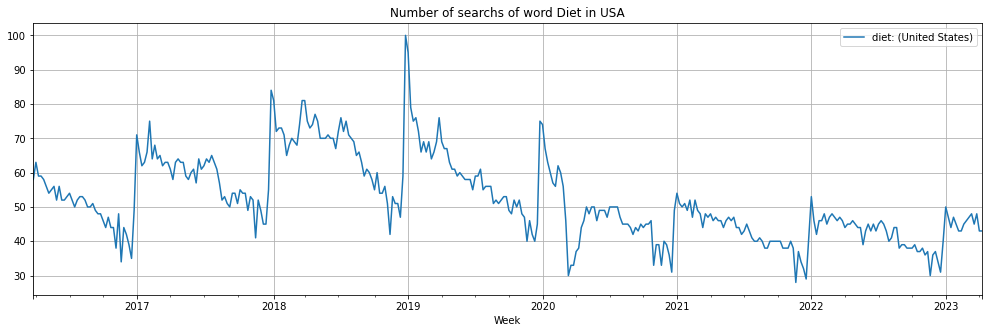

In [4]:
# Plot the entire time series diet and show gridlines
diet_USA.plot(grid=True,figsize=(17,5), title = "Number of searchs of word Diet in USA" )
plt.show()

Before running next cell:
- Do you see any pattern here?
- Do you think this time series has seasonality?
- Trend is additive or multiplicative?

Let's run the next cell and observe the components trend, seasonality, and noise.

* You can also try the code below with `model = 'additive'`

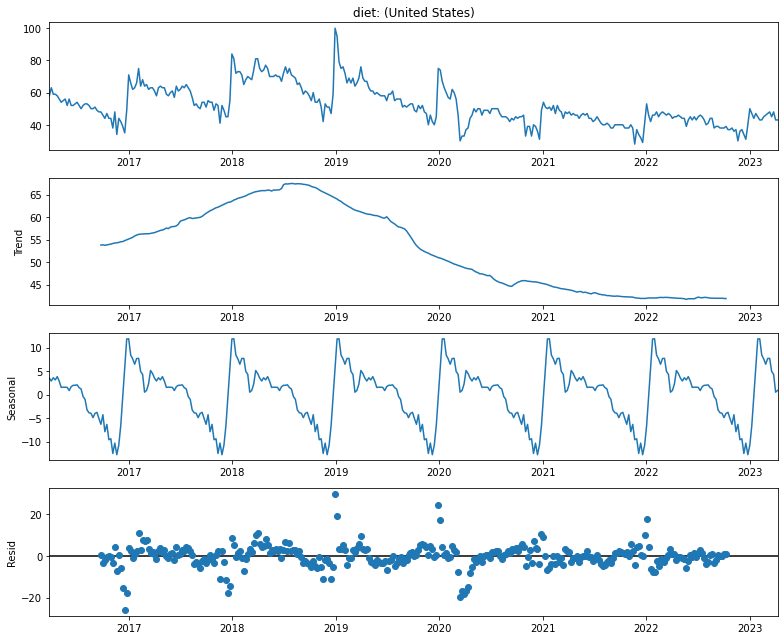

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(diet_USA['diet: (United States)'],
                                         model = 'additive',
                                         period=53 #52 to 53 weeks in a year
                                         )
fig = decomposition.plot()
plt.show()

Now, repeat the steps above to the Dutch data.

What you observe there?

How you would compare the search of the word `diet` in both countries?

In [6]:
diet_NL = pd.read_csv("../data/google_trends/diet_NL_5_years.csv",skiprows=[0,1], index_col='Week', parse_dates=['Week'])
diet_NL.head()

,diet: (Netherlands)
Week,
2018-04-22,48
2018-04-29,42
2018-05-06,50
2018-05-13,59
2018-05-20,52


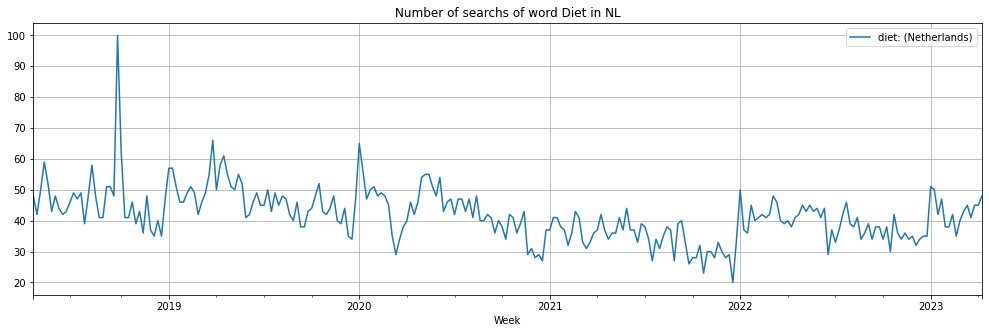

In [7]:
# Plot the entire time series diet and show gridlines
diet_NL.plot(grid=True,figsize=(17,5), title = "Number of searchs of word Diet in NL" )
plt.show()

As from the search of the word diet by the Americans, there is a increase in the search of the word `diet` at the beginning of the year. Although, only years 2020 and 2022 has the highest number of search at the beginning of the year. It suggests `seasonality`. Let's see what seasonality component says.

We can also observe that there is no constant increase or decrease in trend which would suggest a `non-linear trend`.

Let's decompose this time series in its components. Because we believe that trend is non-linear, we will set parameter `model` as multiplicative. By default, this parameter is additive.

Parameter `period` is optional but you can set it depending on the time series. Because the data is given in weeks, we set in period the number of weeks in a year.


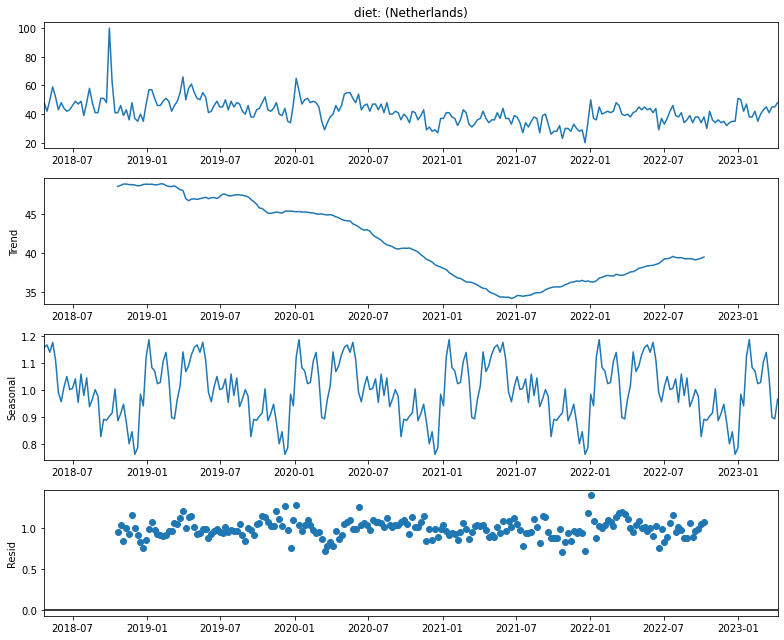

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(diet_NL['diet: (Netherlands)'],
                                         model = 'multiplicative',
                                         period=53 #52 to 53 weeks in a year
                                         )
fig = decomposition.plot()
plt.show()

Once more, observe that both frequency and amplitude of seasonal component do not change with time suggesting linear seasonality, i.e., a seasonal additive model. Let's change parameter model to additive.

### [Air Passenger Data](https://www.kaggle.com/datasets/ashfakyeafi/air-passenger-data-for-time-series-analysis)

Download the data and apply the same steps above.

What you can conclude now?

In [9]:
df_passenger = pd.read_csv("../data/raw/air_passenger_data/AirPassengers.csv",
                index_col=[0],
                  parse_dates=[0])

In [10]:
df_passenger.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


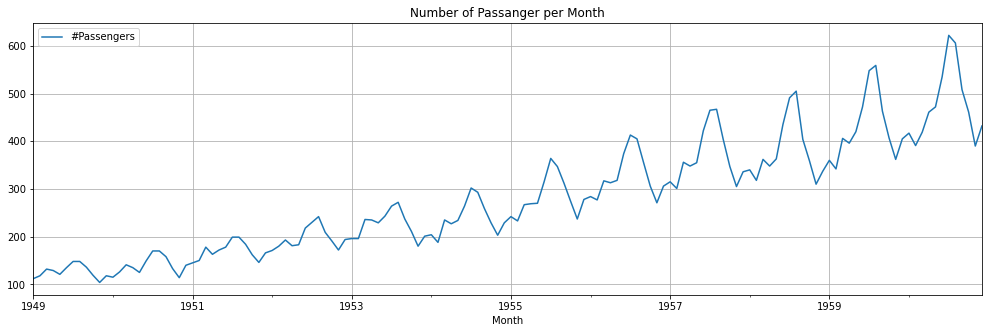

In [11]:
# Plot the entire time series diet and show gridlines
df_passenger.plot(grid=True,figsize=(17,5), title = "Number of Passanger per Month" )
plt.show()

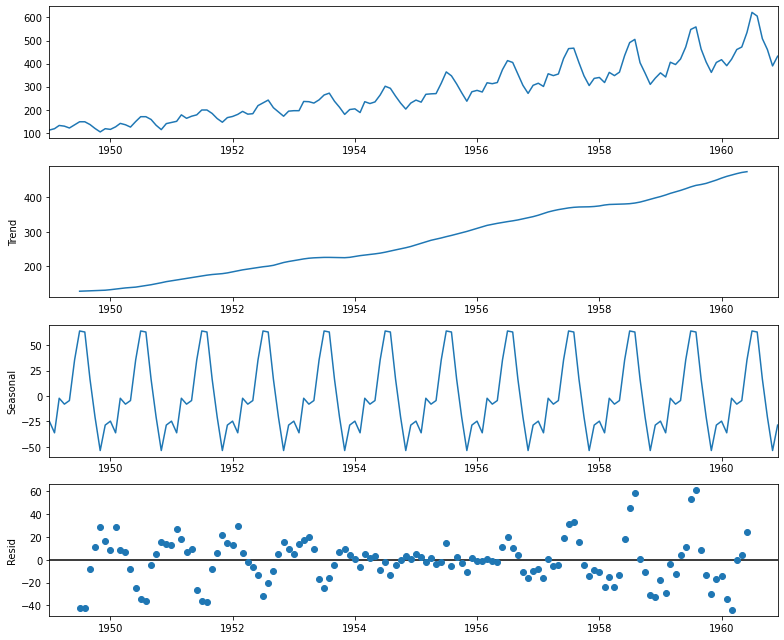

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_passenger,
                                         model = 'additive',
                                         period=12 #52 to 53 weeks in a year
                                         )
fig = decomposition.plot()
plt.show()

Extra: You can use some data from `statsmodel` to play a bit:

* [Mauna Loa Weekly Atmospheric CO2 Data](https://www.statsmodels.org/dev/datasets/generated/co2.html)
* [Grunfeld (1950) Investment Data](https://www.statsmodels.org/dev/datasets/generated/grunfeld.html)
* [Nile River flows at Ashwan 1871-1970](https://www.statsmodels.org/dev/datasets/generated/nile.html)
* [Yearly sunspots data 1700-2008](https://www.statsmodels.org/dev/datasets/generated/sunspots.html)

To load any of these data use the following code as base:

For some of the above data you might need to apply the following:

## Stationary Tests

![](../images/ADF_KPSS.jpg)

<!-- ![](https://github.com/MKB-Datalab/workshop_ts_forecasting/images/Box-Jenkins-Method.PNG) -->

The functions bellow can be found [here](https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html).


In [13]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)    

Apply both tests to Google Trends Diet USA data. What can you conclude?

In [14]:
adf_test(diet_USA)

Results of Dickey-Fuller Test:
Test Statistic                  -2.750802
p-value                          0.065652
#Lags Used                       6.000000
Number of Observations Used    361.000000
Critical Value (1%)             -3.448595
Critical Value (5%)             -2.869580
Critical Value (10%)            -2.571053
dtype: float64


In [15]:
kpss_test(diet_USA)

Results of KPSS Test:
Test Statistic            1.646541
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [16]:
def obtain_adf_kpss_results(timeseries, max_d):
    """ Build dataframe with ADF statistics and p-value for time series after applying difference on time series
    
    Args:
        time_series (df): Dataframe of univariate time series  
        max_d (int): Max value of how many times apply difference
        
    Returns:
        Dataframe showing values of ADF statistics and p when applying ADF test after applying d times 
        differencing on a time-series.
    
    """
    
    results=[]

    for idx in range(max_d):
        adf_result = adfuller(timeseries, autolag='AIC')
        kpss_result = kpss(timeseries, regression='c', nlags="auto")
        timeseries = timeseries.diff().dropna()
        if adf_result[1] <=0.05:
            adf_stationary = True
        else:
            adf_stationary = False
        if kpss_result[1] <=0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True
            
        stationary = adf_stationary & kpss_stationary
            
        results.append((idx,adf_result[1], kpss_result[1],adf_stationary,kpss_stationary, stationary))
    
    # Construct DataFrame 
    results_df = pd.DataFrame(results, columns=['d','adf_stats','kpss_stats', 'is_adf_stationary','is_kpss_stationary','is_stationary' ])
    
    return results_df


In [17]:
obtain_adf_kpss_results(diet_USA, 3)

,d,adf_stats,kpss_stats,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,6.565231e-02,0.01,False,False,False
1,1,4.831303e-18,0.10,True,True,True
2,2,1.404051e-16,0.10,True,True,True


In [18]:
adf_test(diet_USA.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.023802e+01
p-value                        4.831303e-18
#Lags Used                     5.000000e+00
Number of Observations Used    3.610000e+02
Critical Value (1%)           -3.448595e+00
Critical Value (5%)           -2.869580e+00
Critical Value (10%)          -2.571053e+00
dtype: float64


In [19]:
kpss_test(diet_USA.diff().dropna())

Results of KPSS Test:
Test Statistic            0.044188
p-value                   0.100000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


##  Making Time Series Stationary through Differencing

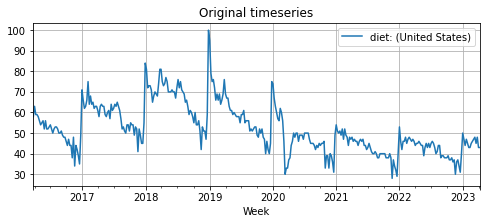

In [20]:
diet_USA.plot(grid=True,figsize=(8,3), title = "Original timeseries" )
plt.show()

After differencing....

In [21]:
diet_USA.diff().head()

,diet: (United States)
Week,
2016-03-27,NaN
2016-04-03,5.0
2016-04-10,-4.0
2016-04-17,0.0
2016-04-24,-1.0


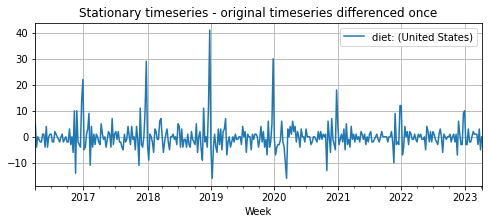

In [22]:
diet_USA.diff().dropna().plot(grid=True,figsize=(8,3), title = "Stationary timeseries - original timeseries differenced once" )
plt.show()

In [23]:
df_stationary = diet_USA.diff().dropna()

Apply test again...

In [24]:
obtain_adf_kpss_results(df_stationary, 3)

,d,adf_stats,kpss_stats,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,4.831303e-18,0.1,True,True,True
1,1,1.404051e-16,0.1,True,True,True
2,2,9.769032e-20,0.1,True,True,True
